<a href="https://colab.research.google.com/github/bhanuteja2001/AI_Curriculum/blob/master/Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret==2.0

     |████████████████████████████████| 256kB 13.2MB/s 
     |████████████████████████████████| 266kB 13.4MB/s 
     |████████████████████████████████| 6.8MB 40.6MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 
     |████████████████████████████████| 1.8MB 50.3MB/s 
     |████████████████████████████████| 66.3MB 44kB/s 
     |████████████████████████████████| 1.6MB 48.9MB/s 
     |████████████████████████████████| 13.9MB 250kB/s 
     |████████████████████████████████| 276kB 62.6MB/s 
     |████████████████████████████████| 102kB 15.2MB/s 
     |████████████████████████████████| 71kB 10.9MB/s 
     |████████████████████████████████| 71kB 11.2MB/s 
     |████████████████████████████████| 3.1MB 48.4MB/s 
     |████████████████████████████████| 604kB 27.0MB/s 
     |████████████████████████████████| 245kB 62.9MB/s 
     |████████████████████████████████| 337kB 64.0MB/s 
     |████████████████████████████████| 81kB 12.1MB/s 
     |████████████████████████████████| 1.1MB 53.2MB/s

In [2]:
import pandas as pd
import numpy as np

In [4]:
Final = pd.read_csv("https://raw.githubusercontent.com/bhanuteja2001/Advanced-Travel-Insurance-Claim-Prediction/main/Insurance_data_preprocessed.csv")
Final.head()

,Duration,Net Sales,Commision (in value),Age,types_Agency,types_Agency Type,types_Distribution Channel,types_Product Name,types_Destination,Claim
0,0.072776,0.072015,0.042140,0.361446,0.571429,0.0,1.0,0.304348,0.703704,0
1,0.078167,0.679754,0.675452,0.590361,0.428571,1.0,1.0,0.652174,0.311111,0
2,0.156334,0.479601,0.476789,0.325301,0.428571,1.0,1.0,0.652174,0.022222,0
3,0.016173,0.088189,0.051505,0.614458,0.571429,0.0,1.0,0.304348,0.400000,0
4,0.018868,0.104363,0.060870,0.746988,0.571429,0.0,1.0,0.304348,0.859259,0


In [3]:
from pycaret.classification import *

In [7]:
clf = setup(data=Final, target = 'Claim')

Setup Succesfully Completed!


,Description,Value
0,session_id,8471
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(60836, 10)"
4,Missing Values,False
5,Numeric Features,8
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [8]:
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.9792,0.9973,0.9812,0.9774,0.9793,0.9584,0.9585,15.6999
1,Extra Trees Classifier,0.9719,0.9944,0.9837,0.9611,0.9723,0.9439,0.9442,1.7812
2,Random Forest Classifier,0.9680,0.9932,0.9685,0.9676,0.9680,0.9361,0.9361,0.4119
3,Decision Tree Classifier,0.9571,0.9574,0.9584,0.9559,0.9572,0.9142,0.9142,0.2201
4,Light Gradient Boosting Machine,0.9569,0.9930,0.9703,0.9450,0.9574,0.9137,0.9140,0.3959
5,K Neighbors Classifier,0.9196,0.9660,0.9759,0.8771,0.9239,0.8392,0.8446,0.2702
6,Gradient Boosting Classifier,0.8511,0.9213,0.8642,0.8423,0.8531,0.7023,0.7026,4.7595
7,Extreme Gradient Boosting,0.8416,0.9150,0.8605,0.8292,0.8445,0.6831,0.6837,1.3454
8,Ada Boost Classifier,0.7832,0.8615,0.7766,0.7872,0.7818,0.5664,0.5666,1.2880
9,Ridge Classifier,0.7199,0.0000,0.6088,0.7829,0.6849,0.4399,0.4512,0.0223


In [1]:
# tune top 5 base models
tuned_top3 = [tune_model(i) for i in top3]
# ensemble top 5 tuned models
bagged_top3 = [ensemble_model(i) for i in tuned_top3]
# blend top 5 base models 
blender = blend_models(estimator_list = top3) 
# run mlflow server (notebook)
!mlflow ui

NameError: ignored

In [9]:
test = pd.read_csv('https://raw.githubusercontent.com/bhanuteja2001/Advanced-Travel-Insurance-Claim-Prediction/main/Insurance_data_test.csv')
test.head()

,Duration,Net Sales,Commision (in value),Age,types_Agency,types_Agency Type,types_Distribution Channel,types_Product Name,types_Destination
0,0.005225,0.329336,0.0,0.299145,0.466667,1.0,1.0,0.416667,0.327586
1,0.010867,0.344754,0.0,0.299145,0.466667,1.0,1.0,0.416667,0.413793
2,0.011076,0.324197,0.0,0.170940,0.466667,1.0,1.0,0.416667,0.413793
3,0.018809,0.315632,0.0,0.247863,0.466667,1.0,1.0,0.416667,0.793103
4,0.001254,0.314775,0.0,0.273504,0.466667,1.0,1.0,0.416667,0.525862


In [18]:
xgboost = create_model('xgboost')
stack_soft = stack_models(top3, meta_model=xgboost)
#stack_soft2 = stack_models(top3, meta_model=xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9865,0.9985,0.9810,0.9918,0.9864,0.9730,0.9730
1,0.9891,0.9992,0.9886,0.9896,0.9891,0.9782,0.9782
2,0.9874,0.9994,0.9881,0.9867,0.9874,0.9749,0.9749
3,0.9891,0.9994,0.9858,0.9924,0.9891,0.9782,0.9782
4,0.9872,0.9988,0.9843,0.9900,0.9872,0.9744,0.9744
5,0.9889,0.9987,0.9858,0.9919,0.9888,0.9777,0.9777
6,0.9862,0.9986,0.9839,0.9886,0.9862,0.9725,0.9725
7,0.9893,0.9993,0.9905,0.9882,0.9893,0.9787,0.9787
8,0.9877,0.9994,0.9853,0.9900,0.9876,0.9753,0.9753
9,0.9881,0.9990,0.9858,0.9905,0.9881,0.9763,0.9763


In [34]:
cm = create_model('rf', verbose = False)

In [35]:
cm_final = finalize_model(cm)

In [23]:
ridge = create_model('ridge')
lda = create_model('lda')
gbc = create_model('gbc')
xgboost = create_model('xgboost')
stack_model_fin = stack_models(estimator_list = [ridge,lda,gbc], meta_model = xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9013,0.9640,0.9189,0.8877,0.9030,0.8027,0.8032
1,0.8992,0.9642,0.9160,0.8862,0.9009,0.7984,0.7988
2,0.8935,0.9616,0.9198,0.8738,0.8962,0.7870,0.7881
3,0.8921,0.9633,0.9179,0.8728,0.8948,0.7842,0.7852
4,0.8878,0.9572,0.9099,0.8714,0.8902,0.7756,0.7764
5,0.8914,0.9643,0.9070,0.8795,0.8930,0.7827,0.7831
6,0.8812,0.9550,0.9241,0.8510,0.8861,0.7623,0.7652
7,0.8959,0.9642,0.9137,0.8823,0.8977,0.7917,0.7922
8,0.8940,0.9627,0.9122,0.8801,0.8959,0.7879,0.7884
9,0.8958,0.9634,0.9169,0.8798,0.8980,0.7917,0.7924


In [87]:
cm_final = finalize_model(calibrated_et)

In [88]:
predictions = predict_model(calibrated_et, data = test)

In [89]:
pd.DataFrame(predictions['Label']).value_counts()

Label
0        15376
1          456
dtype: int64

In [90]:
from google.colab import files
res = pd.DataFrame(predictions['Label']) 
res.columns = ["prediction"]
res.to_csv('pycaret_tuned_cb.csv',index=False)         
files.download('pycaret_tuned_cb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Random Forest

In [39]:
rf = create_model('rf', round = 2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.97,0.99,0.97,0.97,0.97,0.94,0.94
1,0.97,1.00,0.98,0.97,0.97,0.95,0.95
2,0.97,0.99,0.97,0.97,0.97,0.93,0.93
3,0.97,1.00,0.97,0.97,0.97,0.94,0.94
4,0.97,0.99,0.97,0.96,0.97,0.93,0.93
5,0.97,0.99,0.96,0.97,0.97,0.94,0.94
6,0.96,0.99,0.97,0.96,0.96,0.92,0.92
7,0.97,0.99,0.97,0.97,0.97,0.94,0.94
8,0.97,0.99,0.96,0.97,0.97,0.93,0.93
9,0.97,0.99,0.97,0.97,0.97,0.94,0.94


In [40]:
tuned_rf = tune_model(rf, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9749,0.9956,0.9749,0.9749,0.9749,0.9497,0.9497
1,0.9782,0.9954,0.9815,0.9750,0.9783,0.9564,0.9564
2,0.9732,0.9951,0.9758,0.9707,0.9733,0.9464,0.9464
3,0.9746,0.9964,0.9801,0.9695,0.9748,0.9492,0.9493
4,0.9749,0.9951,0.9796,0.9704,0.9750,0.9497,0.9498
5,0.9732,0.9949,0.9715,0.9748,0.9732,0.9464,0.9464
6,0.9713,0.9935,0.9753,0.9675,0.9714,0.9426,0.9426
7,0.9779,0.9945,0.9787,0.9773,0.9780,0.9559,0.9559
8,0.9730,0.9932,0.9730,0.9730,0.9730,0.9459,0.9459
9,0.9770,0.9946,0.9786,0.9754,0.9770,0.9540,0.9540


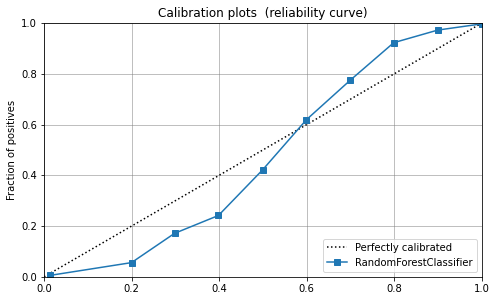

In [42]:
plot_model(rf, plot='calibration')

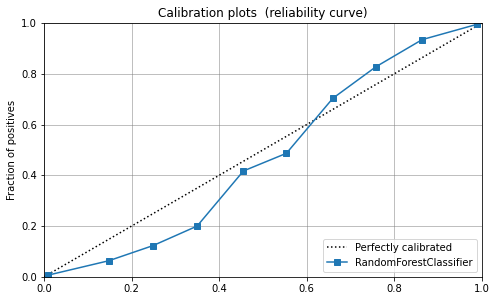

In [41]:
plot_model(tuned_rf, plot='calibration')

In [43]:
calibrated_rf = calibrate_model(tuned_rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9749,0.9960,0.9744,0.9753,0.9748,0.9497,0.9497
1,0.9784,0.9969,0.9806,0.9764,0.9785,0.9568,0.9568
2,0.9720,0.9966,0.9739,0.9702,0.9721,0.9440,0.9440
3,0.9749,0.9973,0.9796,0.9704,0.9750,0.9497,0.9498
4,0.9760,0.9962,0.9796,0.9727,0.9761,0.9521,0.9521
5,0.9737,0.9959,0.9725,0.9748,0.9736,0.9473,0.9473
6,0.9713,0.9953,0.9744,0.9684,0.9714,0.9426,0.9426
7,0.9789,0.9970,0.9806,0.9773,0.9789,0.9578,0.9578
8,0.9732,0.9953,0.9744,0.9721,0.9732,0.9464,0.9464
9,0.9775,0.9961,0.9805,0.9745,0.9775,0.9549,0.9549


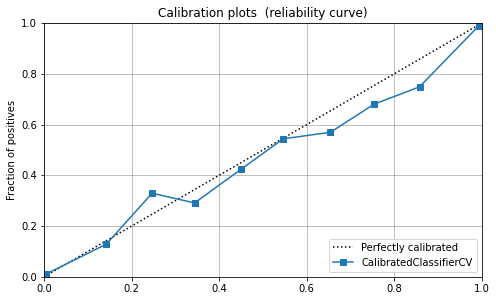

In [44]:
plot_model(calibrated_rf, plot='calibration')

In [55]:
calibrated_rf_isotonic = calibrate_model(rf, method = 'isotonic')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9732,0.9958,0.9734,0.9730,0.9732,0.9464,0.9464
1,0.9756,0.9969,0.9787,0.9727,0.9756,0.9511,0.9512
2,0.9687,0.9961,0.9715,0.9660,0.9688,0.9374,0.9374
3,0.9720,0.9972,0.9772,0.9671,0.9722,0.9440,0.9441
4,0.9720,0.9956,0.9758,0.9685,0.9721,0.9440,0.9440
5,0.9734,0.9954,0.9734,0.9734,0.9734,0.9469,0.9469
6,0.9670,0.9946,0.9749,0.9598,0.9673,0.9341,0.9342
7,0.9770,0.9964,0.9801,0.9741,0.9771,0.9540,0.9540
8,0.9696,0.9955,0.9744,0.9652,0.9698,0.9393,0.9393
9,0.9753,0.9958,0.9801,0.9709,0.9754,0.9507,0.9507


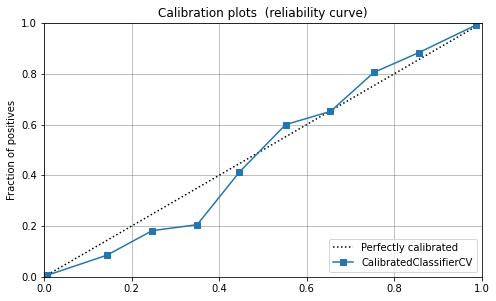

In [56]:
plot_model(calibrated_rf_isotonic, plot='calibration')

## Extra tree

In [49]:
et = create_model('et', round = 2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.97,1.00,0.98,0.97,0.97,0.94,0.95
1,0.97,0.99,0.99,0.97,0.98,0.95,0.95
2,0.97,0.99,0.98,0.96,0.97,0.94,0.94
3,0.97,1.00,0.99,0.96,0.97,0.94,0.94
4,0.97,1.00,0.99,0.96,0.97,0.94,0.94
5,0.97,0.99,0.98,0.96,0.97,0.94,0.94
6,0.97,0.99,0.98,0.95,0.97,0.93,0.93
7,0.97,0.99,0.99,0.96,0.97,0.95,0.95
8,0.97,0.99,0.98,0.96,0.97,0.94,0.94
9,0.98,0.99,0.99,0.97,0.98,0.96,0.96


In [54]:
tuned_et = tune_model(et, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9722,0.9960,0.9815,0.9637,0.9725,0.9445,0.9447
1,0.9725,0.9962,0.9896,0.9569,0.9729,0.9450,0.9455
2,0.9732,0.9955,0.9910,0.9569,0.9737,0.9464,0.9470
3,0.9682,0.9968,0.9877,0.9507,0.9688,0.9364,0.9371
4,0.9687,0.9954,0.9867,0.9524,0.9692,0.9374,0.9380
5,0.9675,0.9959,0.9801,0.9560,0.9679,0.9350,0.9353
6,0.9623,0.9945,0.9806,0.9460,0.9630,0.9246,0.9252
7,0.9708,0.9945,0.9915,0.9522,0.9714,0.9417,0.9425
8,0.9668,0.9949,0.9834,0.9518,0.9673,0.9336,0.9341
9,0.9746,0.9953,0.9896,0.9608,0.9750,0.9492,0.9497


In [86]:
calibrated_et = calibrate_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9727,0.9958,0.9734,0.9721,0.9727,0.9454,0.9454
1,0.9756,0.9967,0.9796,0.9718,0.9757,0.9511,0.9512
2,0.9725,0.9959,0.9782,0.9672,0.9726,0.9450,0.9450
3,0.9739,0.9970,0.9815,0.9668,0.9741,0.9478,0.9479
4,0.9715,0.9961,0.9796,0.9641,0.9718,0.9431,0.9432
5,0.9711,0.9961,0.9753,0.9671,0.9712,0.9421,0.9422
6,0.9647,0.9945,0.9734,0.9566,0.9650,0.9293,0.9295
7,0.9746,0.9953,0.9862,0.9638,0.9749,0.9492,0.9495
8,0.9680,0.9953,0.9715,0.9647,0.9681,0.9359,0.9360
9,0.9786,0.9953,0.9853,0.9724,0.9788,0.9573,0.9574


## Decision Tree

In [65]:
ds = create_model('dt', round = 2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.96,0.96,0.96,0.97,0.96,0.93,0.93
1,0.96,0.96,0.96,0.96,0.96,0.91,0.91
2,0.95,0.96,0.96,0.95,0.95,0.91,0.91
3,0.96,0.96,0.96,0.95,0.96,0.92,0.92
4,0.96,0.96,0.96,0.95,0.96,0.92,0.92
5,0.95,0.95,0.95,0.96,0.95,0.91,0.91
6,0.95,0.95,0.96,0.95,0.95,0.91,0.91
7,0.96,0.96,0.96,0.96,0.96,0.92,0.92
8,0.95,0.95,0.96,0.95,0.95,0.91,0.91
9,0.96,0.96,0.96,0.96,0.96,0.92,0.92


In [66]:
tuned_et = tune_model(ds, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7925,0.8683,0.8819,0.7481,0.8095,0.5849,0.5945
1,0.7972,0.8674,0.8506,0.7685,0.8075,0.5944,0.5978
2,0.7787,0.8584,0.8306,0.7525,0.7896,0.5574,0.5604
3,0.7913,0.8637,0.8681,0.7525,0.8062,0.5825,0.5895
4,0.7740,0.8532,0.8316,0.7456,0.7863,0.5479,0.5516
5,0.7882,0.8705,0.8430,0.7597,0.7992,0.5764,0.5799
6,0.7759,0.8540,0.8311,0.7484,0.7876,0.5517,0.5551
7,0.7827,0.8546,0.8430,0.7523,0.7951,0.5655,0.5696
8,0.7734,0.8523,0.8325,0.7446,0.7861,0.5468,0.5507
9,0.7829,0.8613,0.8391,0.7543,0.7944,0.5658,0.5695


## cat boost

In [75]:
cb = create_model('catboost', round = 2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.98,1.00,0.98,0.98,0.98,0.95,0.95
1,0.98,1.00,0.98,0.98,0.98,0.96,0.96
2,0.98,1.00,0.99,0.98,0.98,0.96,0.96
3,0.98,1.00,0.98,0.98,0.98,0.96,0.96
4,0.98,1.00,0.98,0.98,0.98,0.96,0.96
5,0.98,1.00,0.98,0.98,0.98,0.96,0.96
6,0.97,1.00,0.98,0.97,0.97,0.95,0.95
7,0.98,1.00,0.98,0.98,0.98,0.96,0.96
8,0.98,1.00,0.98,0.98,0.98,0.96,0.96
9,0.98,1.00,0.98,0.98,0.98,0.96,0.96


In [76]:
tuned_cb = tune_model(cb, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9533,0.9909,0.9630,0.9446,0.9537,0.9065,0.9067
1,0.9552,0.9913,0.9744,0.9383,0.9560,0.9103,0.9110
2,0.9549,0.9923,0.9744,0.9379,0.9558,0.9099,0.9106
3,0.9530,0.9923,0.9730,0.9357,0.9540,0.9061,0.9068
4,0.9537,0.9912,0.9763,0.9342,0.9548,0.9075,0.9084
5,0.9580,0.9925,0.9758,0.9423,0.9588,0.9160,0.9166
6,0.9476,0.9902,0.9768,0.9229,0.9491,0.8952,0.8967
7,0.9537,0.9906,0.9763,0.9342,0.9548,0.9075,0.9084
8,0.9559,0.9909,0.9801,0.9348,0.9569,0.9117,0.9128
9,0.9554,0.9906,0.9725,0.9403,0.9561,0.9108,0.9113
